In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.preprocessing
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os

In [2]:
# Load Dataset
mv =  pd.read_csv('movies.csv')

In [3]:
mv.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rt = pd.read_csv("ratings.csv")

In [5]:
ratings_data=pd.read_csv("ratings.csv")
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
rt.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
rt.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [8]:
rt.shape

(100836, 4)

In [9]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [10]:
# merge Dataset 
df = mv.merge(rt, on="movieId")

In [11]:
df.describe(include = 'all')

,movieId,title,genres,userId,rating,timestamp
count,96693.000000,96693,96693,96693.000000,96693.000000,9.669300e+04
unique,NaN,7219,831,NaN,NaN,NaN
top,NaN,Forrest Gump (1994),Comedy,NaN,NaN,NaN
freq,NaN,329,6702,NaN,NaN,NaN
mean,15993.980805,NaN,NaN,325.247608,3.510120,1.197274e+09
std,29330.123314,NaN,NaN,182.042720,1.036672,2.138318e+08
min,1.000000,NaN,NaN,1.000000,0.500000,8.281246e+08
25%,1167.000000,NaN,NaN,177.000000,3.000000,1.005967e+09
50%,2819.000000,NaN,NaN,325.000000,3.500000,1.179166e+09
75%,6967.000000,NaN,NaN,477.000000,4.000000,1.430332e+09


In [12]:
df.describe(include = 'object')

,title,genres
count,96693,96693
unique,7219,831
top,Forrest Gump (1994),Comedy
freq,329,6702


In [13]:
# after merge check shape
df.shape

(96693, 6)

In [14]:
df.describe(include = 'number')

,movieId,userId,rating,timestamp
count,96693.000000,96693.000000,96693.000000,9.669300e+04
mean,15993.980805,325.247608,3.510120,1.197274e+09
std,29330.123314,182.042720,1.036672,2.138318e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1167.000000,177.000000,3.000000,1.005967e+09
50%,2819.000000,325.000000,3.500000,1.179166e+09
75%,6967.000000,477.000000,4.000000,1.430332e+09
max,148626.000000,610.000000,5.000000,1.537799e+09


In [15]:
df.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

In [16]:
# check null values in DataFrame
df.isna().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [17]:
# check duplicate values in DataFrame
df.duplicated().sum()

0

In [18]:
# check 0 index values of genres in DataFrame
df.iloc[0].genres

'Adventure|Animation|Children|Comedy|Fantasy'

In [19]:
# creating data frame trend with total rating and average rating
trend=pd.DataFrame(df.groupby('title')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count()) 
trend.head()

,rating,total number of ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Til There Was You (1997),4.000000,2
"'burbs, The (1989)",3.176471,17


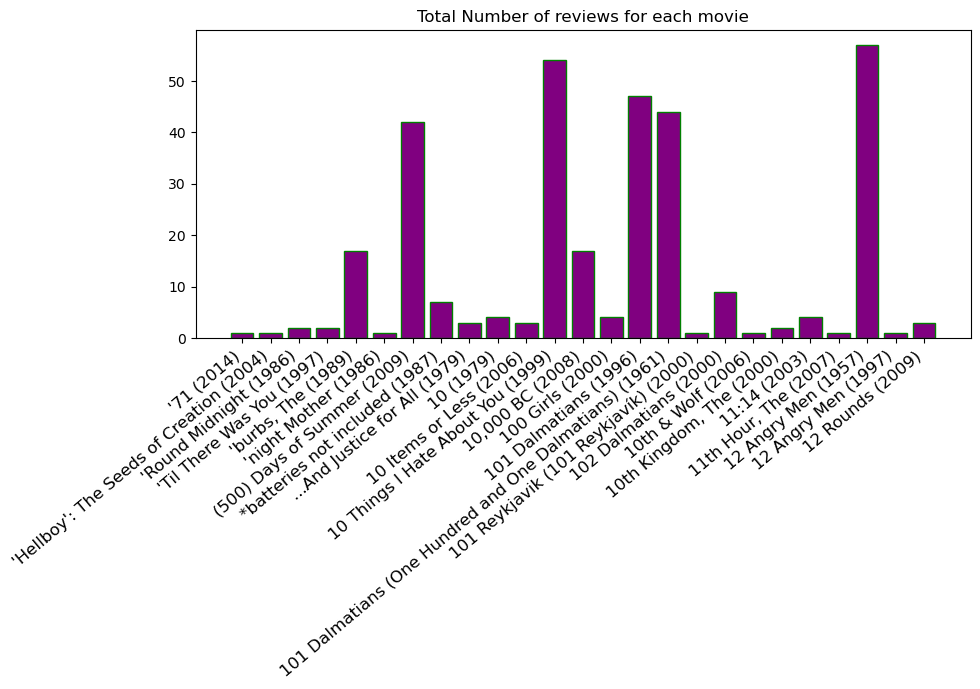

In [20]:
# Create a figure and axis
plt.figure(figsize =(10, 4))
ax=plt.subplot()
ax.bar(trend.head(25).index,trend['total number of ratings'].head(25),color='Purple',edgecolor='green')

import warnings

# Suppress all UserWarnings globally
warnings.simplefilter("ignore", category=UserWarning)

# Set the x-axis tick positions
ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie")

# Show the plot
plt.show()


In [21]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
True Stories (1986)                                     5.0
Chinese Puzzle (Casse-tête chinois) (2013)              5.0
The Jinx: The Life and Deaths of Robert Durst (2015)    5.0
Idiots and Angels (2008)                                5.0
Bossa Nova (2000)                                       5.0
Name: rating, dtype: float64

In [22]:
# Check data types
print(df['genres'].dtype)  # Should be a string (object)
print(df['rating'].dtype)  # Should be a string (object)


object
float64


In [23]:
# Convert 'rating' column to a string
df['rating'] = df['rating'].astype(str)

In [24]:
# create new columns and merge columns
df['tags']= df['genres'] + df['rating'] 


In [25]:
df.sample(3)

,movieId,title,genres,userId,rating,timestamp,tags
74923,8228,"Maltese Falcon, The (a.k.a. Dangerous Female) ...",Mystery,477,3.0,1200943091,Mystery3.0
27880,1256,Duck Soup (1933),Comedy|Musical|War,216,3.0,975212038,Comedy|Musical|War3.0
95472,113532,"Inbetweeners 2, The (2014)",Comedy,448,3.5,1472584520,Comedy3.5


In [26]:
# Check the column names in your DataFrame
print(df.columns)

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp', 'tags'], dtype='object')


In [27]:
# create new dataFrame with 3 columns
new_df = df[['userId','title','tags']]

In [28]:
new_df

,userId,title,tags
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy4.0
1,5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy4.0
2,7,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy4.5
3,15,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy2.5
4,17,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy4.5
...,...,...,...
96688,560,The Big Short (2015),Drama4.5
96689,564,The Big Short (2015),Drama3.5
96690,567,The Big Short (2015),Drama3.0
96691,599,The Big Short (2015),Drama3.0


In [29]:
# check 0 index values of tags in DataFrame
new_df['tags'][0]

'Adventure|Animation|Children|Comedy|Fantasy4.0'

In [30]:
# apply lambda function for join all values in tags 
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x) if isinstance(x, list) else x)

# Print the modified DataFrame
print(new_df)

       userId                 title  \
0           1      Toy Story (1995)   
1           5      Toy Story (1995)   
2           7      Toy Story (1995)   
3          15      Toy Story (1995)   
4          17      Toy Story (1995)   
...       ...                   ...   
96688     560  The Big Short (2015)   
96689     564  The Big Short (2015)   
96690     567  The Big Short (2015)   
96691     599  The Big Short (2015)   
96692     610  The Big Short (2015)   

                                                 tags  
0      Adventure|Animation|Children|Comedy|Fantasy4.0  
1      Adventure|Animation|Children|Comedy|Fantasy4.0  
2      Adventure|Animation|Children|Comedy|Fantasy4.5  
3      Adventure|Animation|Children|Comedy|Fantasy2.5  
4      Adventure|Animation|Children|Comedy|Fantasy4.5  
...                                               ...  
96688                                        Drama4.5  
96689                                        Drama3.5  
96690                      

C:\Users\ayesh\AppData\Local\Temp\ipykernel_14900\3351266085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x) if isinstance(x, list) else x)


In [31]:
# after join  
new_df['tags'][2]

'Adventure|Animation|Children|Comedy|Fantasy4.5'

In [32]:
new_df.sample(5)

,userId,title,tags
33344,448,Money Talks (1997),Action|Comedy3.0
79306,354,"Island, The (2005)",Action|Sci-Fi|Thriller4.5
3655,265,Taxi Driver (1976),Crime|Drama|Thriller3.0
78286,232,Constantine (2005),Action|Fantasy|Horror|Thriller3.0
45733,288,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi4.0


In [33]:
# Apply lambda function using .loc to avoid SettingWithCopyWarning
new_df['tags'] = new_df['tags'].apply(lambda x: x.lower() if isinstance(x, str) else x)

# Print the modified DataFrame
print(new_df)

       userId                 title  \
0           1      Toy Story (1995)   
1           5      Toy Story (1995)   
2           7      Toy Story (1995)   
3          15      Toy Story (1995)   
4          17      Toy Story (1995)   
...       ...                   ...   
96688     560  The Big Short (2015)   
96689     564  The Big Short (2015)   
96690     567  The Big Short (2015)   
96691     599  The Big Short (2015)   
96692     610  The Big Short (2015)   

                                                 tags  
0      adventure|animation|children|comedy|fantasy4.0  
1      adventure|animation|children|comedy|fantasy4.0  
2      adventure|animation|children|comedy|fantasy4.5  
3      adventure|animation|children|comedy|fantasy2.5  
4      adventure|animation|children|comedy|fantasy4.5  
...                                               ...  
96688                                        drama4.5  
96689                                        drama3.5  
96690                      

C:\Users\ayesh\AppData\Local\Temp\ipykernel_14900\270968219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: x.lower() if isinstance(x, str) else x)


In [34]:
new_df.head(4)

,userId,title,tags
0,1,Toy Story (1995),adventure|animation|children|comedy|fantasy4.0
1,5,Toy Story (1995),adventure|animation|children|comedy|fantasy4.0
2,7,Toy Story (1995),adventure|animation|children|comedy|fantasy4.5
3,15,Toy Story (1995),adventure|animation|children|comedy|fantasy2.5


In [35]:
from nltk.stem import PorterStemmer

# Create an instance of the Porter Stemmer
ps = PorterStemmer()

In [36]:
ps = PorterStemmer()

In [37]:
# apply stemmer because one word repeated
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y)

In [45]:
new_df = new_df.copy()
new_df['tags'] = new_df['tags'].apply(lambda x: stem(x))

In [39]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words="english")

In [41]:
# conver all movie for vector form
cv = CountVectorizer(max_features=5000,stop_words="english")

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

custom_stop_words = ["stopword1", "stopword2", "stopword3"]  # Replace with your custom stopwords

# Create an instance of CountVectorizer with custom stop words
cv = CountVectorizer(max_features=5000, stop_words=custom_stop_words, lowercase=True, token_pattern=r'\b\w+\b')

# Fit and transform the 'tags' data
vector = cv.fit_transform(new_df['tags']).toarray()

In [47]:
vector = cv.fit_transform(new_df['tags']).toarray()

In [48]:
vector

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
# Get feature names
feature_names = cv.get_feature_names_out()

# Print the first few feature names
print(feature_names[:10])  # Replace 10 with the number of feature names you want to display

['0' '5' 'action' 'action0' 'action1' 'action2' 'action3' 'action4'
 'action5' 'adventure']


In [50]:
feature_names = cv.get_feature_names_out()

In [51]:
# create Recommender function
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = similarty[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in movies_list:
        print(new_df.iloc[i[0]] .title)
    return

In [52]:
def recommend(movie):
    try:
        movie_index = new_df[new_df['title'] == movie].index[0]
        distances = similarity[movie_index]
        movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]
        recommended_movies = []
        for i in movies_list:
            movie_id = new_df.iloc[i[0]].movie_id
            recommended_movies.append(get_title_from_id(movie_id))
        return recommended_movies
    except IndexError:
        return f"'{movie}' Avatar"


In [53]:
def recommend(movie):
    try:
        movie_index = new_df[new_df['title'] == movie].index[0]
        distances = similarity[movie_index]
        movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]
        recommended_movies = []
        for i in movies_list:
            movie_id = new_df.iloc[i[0]].movie_id
            recommended_movies.append(get_title_from_id(movie_id))
        return recommended_movies
    except IndexError:
        return f"'{movie}' Batman Begins "

In [54]:
def recommend(movie):
    try:
        movie_index = new_df[new_df['title'] == movie].index[0]
        distances = similarity[movie_index]
        movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]
        recommended_movies = []
        for i in movies_list:
            movie_id = new_df.iloc[i[0]].movie_id
            recommended_movies.append(get_title_from_id(movie_id))
        return recommended_movies
    except IndexError:
        return f"'{movie}' April Fool's Day"


In [55]:
def recommend(movie):
    try:
        movie_index = new_df[new_df['title'] == movie].index[0]
        distances = similarity[movie_index]
        movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]
        recommended_movies = []
        for i in movies_list:
            movie_id = new_df.iloc[i[0]].movie_id
            recommended_movies.append(get_title_from_id(movie_id))
        return recommended_movies
    except IndexError:
        return f"'{movie}'Witless Protection"


In [56]:
new_df.sample(10)

,userId,title,tags
65459,105,40 Days and 40 Nights (2002),comedy|romance3.0
44078,88,¡Three Amigos! (1986),comedy|western3.5
52216,414,"Hurricane, The (1999)",drama4.0
4168,377,Apollo 13 (1995),adventure|drama|imax5.0
54764,156,"Odd Couple, The (1968)",comedy4.0
989,302,Sense and Sensibility (1995),drama|romance5.0
13236,452,Jurassic Park (1993),action|adventure|sci-fi|thriller4.0
62498,380,Jurassic Park III (2001),action|adventure|sci-fi|thriller4.0
53081,239,"Boondock Saints, The (2000)",action|crime|drama|thriller5.0
67502,66,Spirited Away (Sen to Chihiro no kamikakushi) ...,adventure|animation|fantasy4.5
